<a href="https://colab.research.google.com/github/ririssilvia/Machine-Learning-D4TI/blob/main/js13(week15)/Dimensional_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Riris Silvia Zahri**

**NIM : 2241727029**

**Kelas : D4TI-4J**



---




Dengan ketersediaan CPU dan GPU berperforma tinggi, sangat mungkin untuk menyelesaikan setiap proses regresi, klasifikasi, pengelompokan, dan masalah terkait lainnya menggunakan pembelajaran mesin dan model pembelajaran secara mendalam. Namun, masih ada berbagai bagian yang menyebabkan kemacetan kinerja saat mengembangkan model tersebut. Sejumlah besar fitur dalam kumpulan data adalah salah satu faktor utama yang memengaruhi waktu pelatihan serta keakuratan model dalam machine learning/pembelajaran mesin.

Permasalahan Dimensi disebut oleh ahli matematika R. Bellman dalam bukunya "Dynamic Programming" pada tahun 1957. Menurutnya, permasalahan dimensi adalah masalah yang disebabkan oleh peningkatan volume eksponensial yang terkait dengan penambahan dimensi ekstra ke ruang Euclidean. Dalam pembelajaran mesin, "dimensionalitas" merujuk pada jumlah fitur (yaitu variabel masukan) dalam kumpulan data. 

Sementara kinerja model pembelajaran mesin apapun, akan meningkat jika dilakukan penambahan fitur tambahan, di beberapa titik penyisipan lebih lanjut mengarah pada penurunan kinerja yaitu ketika jumlah fitur sangat besar dan sepadan dengan jumlah pengamatan dalam sekelompok kumpulan data, beberapa algoritme linier berusaha extra untuk dapat melatih model yang lebih efisien.
Problem dimensi pada dasarnya berarti bahwa kesalahan meningkat dengan bertambahnya jumlah fitur. Ini mengacu pada fakta bahwa algoritma lebih sulit untuk dirancang dalam dimensi tinggi dan seringkali memiliki peningkatan waktu secara eksponensial.

Maka dibutuhkan cara yang lebih baik untuk menangani data berdimensi tinggi sehingga dapat dengan cepat mengekstrak pola dan khowledge darinya. 
Jadi bagaimana cara untuk mendapatkan kumpulan data seperti itu? Maka digunakanlah teknik dimensional reduction/pengurangan dimensi, untuk mengurangi jumlah fitur dalam kumpulan data tanpa harus kehilangan banyak informasi dan mempertahankan (atau meningkatkan) kinerja model.

Pengurangan dimensi/dimensional reduction adalah seperangkat teknik yang mempelajari cara mengecilkan ukuran data namun sambil tetap mempertahankan informasi yang paling penting dan selanjutnya mengatasi permasalahan dimensi. Teknik ini memainkan peran penting dalam masalah kinerja proses klasifikasi dan clustering.
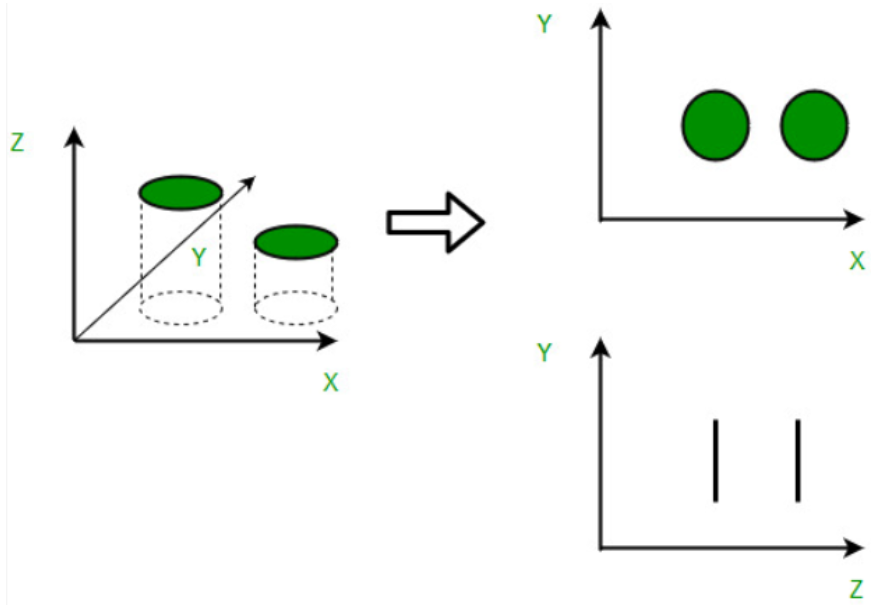


# Dimensionality Reduction Techniques

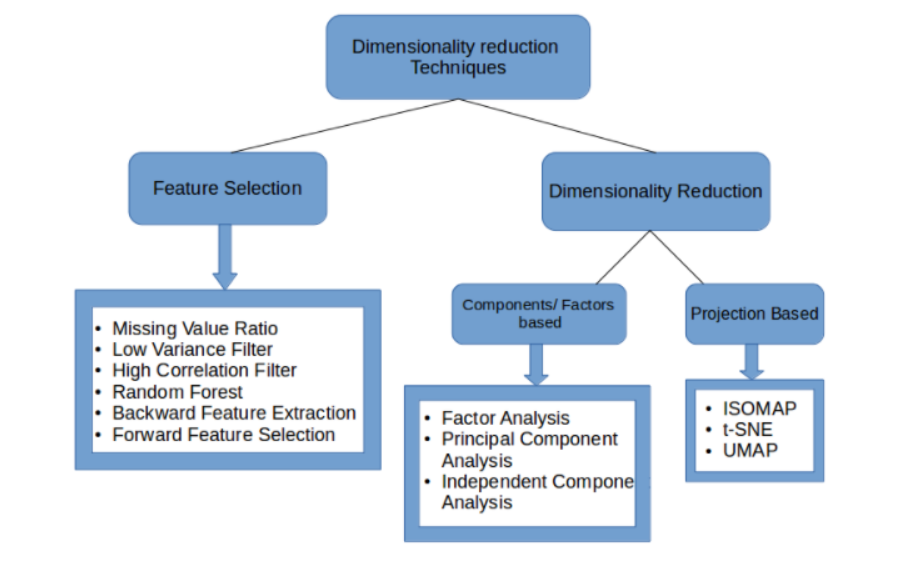

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read the data
train=pd.read_csv("train.csv")
train.head()

In [ ]:
# checking the percentage of missing values in each variable
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
# remove the variables having more than 20% missing variables
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

In [ ]:
variable

Kita perlu menghitung varian dari setiap variabel yang diberikan. Kemudian drop variabel yang memiliki varians rendah dibandingkan dengan variabel lain dalam kumpulan dataset. Alasan melakukan ini adalah bahwa variabel dengan varian rendah tidak akan mempengaruhi variabel target/label.

In [ ]:
# Missing Value imputation
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [ ]:
# Variance calculation
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [ ]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = []
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i])


In [ ]:
variable

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']

## Factor analysis

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
images = [cv2.imread(file) for file in glob('/content/drive/MyDrive/Colab Notebooks/train_.zip (Unzipped Files)/train/*.png')]

In [ ]:
images = np.array(images)
images.shape

(60000, 28, 28, 3)

In [ ]:
image = []
for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

In [ ]:
train = pd.read_csv("train_/train.csv")     # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

In [ ]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)

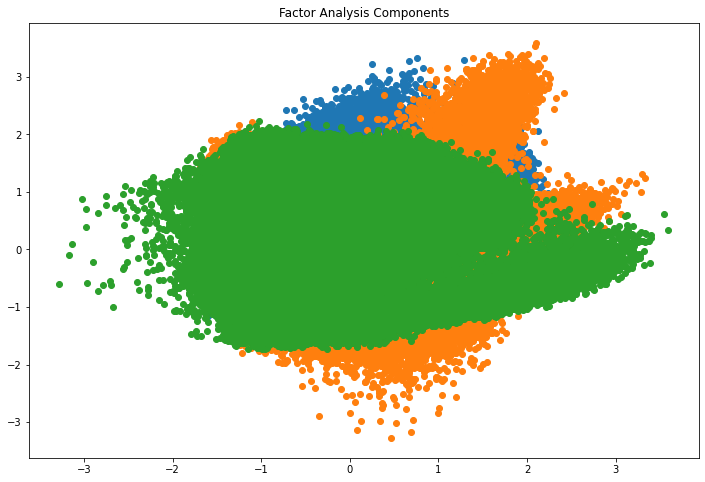

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

Sulit untuk mengamati faktor-faktor ini satu per satu, tetapi tujuan mengurangi dimensi data telah berhasil.

## Principal Component Analysis (PCA)

PCA adalah teknik yang membantu kita mengekstrak satu set variabel baru dari satu set variabel besar yang ada. Variabel yang baru diekstraksi ini disebut Principal Components.

In [ ]:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28*3)).astype(float))


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

In this case, n_components will decide the number of principal components in the transformed data. Let’s visualize how much variance has been explained using these 4 components. We will use explained_variance_ratio_ to calculate the same.

In [ ]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))


In [ ]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

In [ ]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)

In [ ]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

> <b>Missing Value Ratio</b>: Jika kumpulan data memiliki terlalu banyak nilai yang hilang, perlu menggunakan pendekatan ini untuk mengurangi jumlah variabel. Kita dapat membuang variabel yang memiliki banyak nilai yang hilang di dalamnya

> <b>Factor Analysis</b>: Teknik ini paling cocok untuk situasi di mana kita memiliki kumpulan variabel yang sangat berkorelasi. Teknik ini membagi variabel berdasarkan korelasinya ke dalam kelompok yang berbeda, dan mewakili setiap kelompok dengan sebuah faktor

> <b>Principal Component Analysis</b>: Ini adalah salah satu teknik yang paling banyak digunakan untuk menangani data linier. Tekni ini membagi data menjadi satu set komponen dengan cara menjelaskan varians sebanyak mungkin

## References:
[Dimensionality Reduction](https://www.kdnuggets.com/2020/05/dimensionality-reduction-principal-component-analysis.html)<br>
[Dimensionality Reduction Techniques](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/)<br>